<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Principal_Components_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Components Analysis  (PCA)

In this module we will look into the PCA technique for data compression and dimensionality reduction.

Let $x_i \in \mathcal{R}^n$, $i = 1,2, \ldots,M$ denote the data samples. We assume that the data samples have zero mean.  If not, we subtract the empirical mean from  each samples to make the samples zero mean, i.e.,
$x_i = x_i - \mu$, where $\mu = \frac{1}{M}\sum_{i=1}^Mx_i$.

PCA basically finds the eigenvectors of the covariance matrix $\Sigma = \frac{1}{M}\sum_{i=1}^M x_i x_i^T$. The datapoints are then projected along the principal eigenvectors of the covariance matrix.

### PCA derivation for projection to single dimension

We will now show that PCA provides the optimal linear projection that minimises the mean squared error between the original data points and the re-projected data points.

Let us begin by looking at projections to a single dimension. For  a projection vector $w$, let the re-projection for a data point $x$ be denoted by $\hat{x}= (w^Tx)w$. Note that all projection vectors need to be unit norm vectors, i.e., $w^Tw = 1$. The mean square error (MSE) for all the data points is
\begin{align}
MSE(w) = \frac{1}{M} \sum_{i=1}^M \Vert x_i - (w^Tx_i)w \Vert^2.
\end{align}

The aim is to find the optimum $w^*$ that minimises the MSE

\begin{align}
w^* &= \arg\min_{w:\Vert w \Vert = 1} MSE(w)\\
& =\arg\min_{w:\Vert w \Vert = 1}  \frac{1}{M} \sum_{i=1}^M \Vert x_i - (w^Tx_i)w \Vert^2\\
& = \arg\min_{w:\Vert w \Vert = 1}  \frac{1}{M} \sum_{i=1}^M (x_i - (w^Tx_i)w)^T  (x_i - (w^Tx_i)w)\\
& = \arg\min_{w:\Vert w \Vert = 1}  \frac{1}{M} \sum_{i=1}^M x_i^Tx_i - (w^Tx_i)(w^Tx_i) - (w^Tx_i)(x_i^Tw)+(w^Tx_i)^2 w^Tw\\
& = \arg\min_{w:\Vert w \Vert = 1}  \frac{1}{M} \sum_{i=1}^M x_i^Tx_i - (w^Tx_i)^2\\
&= \arg\max_{w:\Vert w \Vert = 1}  \frac{1}{M} \sum_{i=1}^M w^Tx_ix_i^Tw\\
&= \arg\max_{w:\Vert w \Vert = 1}  w^T \left(\frac{1}{M} \sum_{i=1}^M x_ix_i^T \right)w.
\end{align}

We know that the solution to the above problem is the eigenvector of the covariance matrix $\Sigma = \frac{1}{M} \sum_{i=1}^M x_ix_i^T $ corresponding to the largest eigenvalue. Similarly, we can show that the projection matrix for projecting to a $k$ dimensional subspace consists of the eigenvectors corresponding to the largest $k$ eigenvalues of the covariance matrix.

## PCA from SVD
Let $X = [x_1,x_2.\ldots,x_M]$. Then the covariance matrix can be written as $\Sigma = XX^T$, where $X \in \mathcal{R}^{n \times M}$. Let the SVD decomposition of $X$ be $X = UDV^T = \sum_{i=1}^{\min(m,n)} \sigma_iu_iv_i^T$, where $U$ and $V$ are unitary matrices ($UU^T = I, VV^T = I$) and $D$ is a diagonal matrix, such that the diagonals are in descending order, and $\sigma_i$ are the singular values. The covariance can then the written as $\Sigma = UD^2U^T$. Hence, the $k$ principal eigenvectors of $\Sigma$ are the first $k$ columns of $U$.

In [0]:
_#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

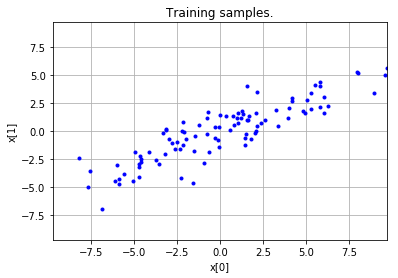

In [139]:
# Generate skewed data points in 2D
num_x1_samples = 100 # number of samples from Class 1

theta_rot = (-np.pi)/3
sigma_1 = 1
sigma_2 = 5
rot_mat = np.array([[np.cos(theta_rot), -np.sin(theta_rot)],[np.sin(theta_rot), np.cos(theta_rot)]])
cov_sqrt = np.array([[sigma_1,0],[0,sigma_2]])
comb_mat = np.matmul(rot_mat,cov_sqrt)

mu_1 = np.array([[0,0]]).T # Mean of the points in Class 1
x1 = np.random.randn(num_x1_samples,2)  # Generate num_x1_samples points for Class 1, with mean of mu_1
x1=np.matmul(x1, comb_mat.T)+ mu_1.T


plt.plot(x1[:,0],x1[:,1],'.b')

plt.grid()
plt.title("Training samples.")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
axis_lim = np.max(x1)
plt.xlim(-axis_lim,axis_lim)
plt.ylim(-axis_lim,axis_lim)
plt.show()

X = x1.T  #Note that we had generated x1 with the rows as the samples and columns as the features.
          #In our model above, the rows of X are the features and columns as the samples


eigenvalues =  [50.25203903  9.08185711]
eigenvectors =  [[ 0.85777795 -0.51402041]
 [ 0.51402041  0.85777795]]
(2, 100)


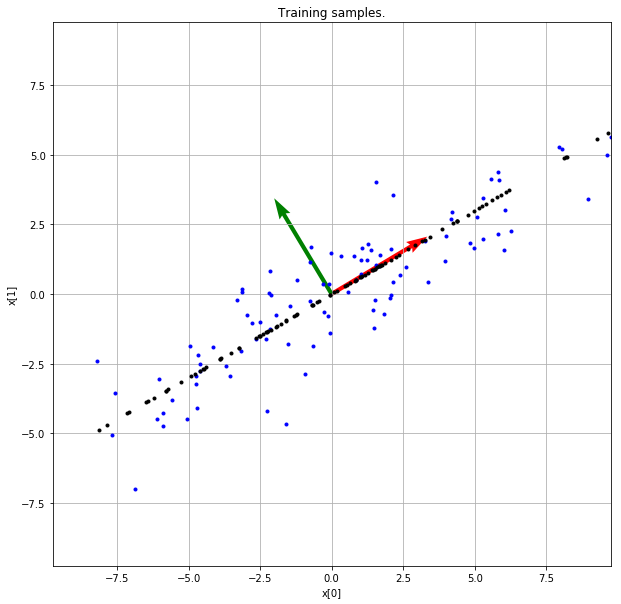

In [140]:
## Compute the principal components by eigenvector decomposition of the covariance matrix

cov_mat = np.matmul(X,X.T)/X.shape[1]
[eigenvalue,eigenvectors] = np.linalg.eig(cov_mat)
idx = np.argsort(-abs(eigenvalue))   #sort eigenvalues in descending order
eigenvalue = eigenvalue[idx] #re-arrage the eigenvalues in descending order
eigenvectors = eigenvectors[:,idx] #re-arrange the eigenvectors in descending order
print("eigenvalues = ",eigenvalues)
print("eigenvectors = ", eigenvectors)


projection_1 = np.matmul(eigenvectors[:,0:1].T,X) #compute the strength of the projection in the direction of the principal component
projection_1 = np.matmul(eigenvectors[:,0:1],projection_1) #compute the projections
print(projection_1.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(eigenvectors[0,0], eigenvectors[1,0],linewidth=10,scale=5,color='r')
ax.quiver(eigenvectors[0,1], eigenvectors[1,1],linewidth=10,scale=5,color='g')
ax.plot(x1[:,0],x1[:,1],'.b')
ax.plot(projection_1[0,:],projection_1[1,:],'.k')
axis_lim = np.max(X)
plt.xlim(-axis_lim,axis_lim)
plt.ylim(-axis_lim,axis_lim)

plt.grid()
plt.title("Training samples.")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.show()


singular_values = [55.76694046 10.56472491]
eigenvectors_l = [[-0.85777795 -0.51402041]
 [-0.51402041  0.85777795]]


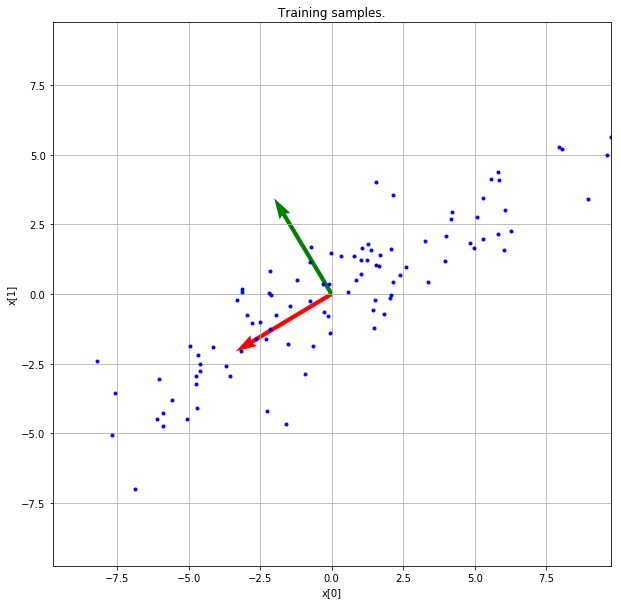

In [141]:
## Compute the principals component by SVD of X matrix

[eigenvectors_l,singular_values,eigenvectors_r] = np.linalg.svd(X) #svd output is sorted in descending order

print("singular_values =", singular_values)
print("eigenvectors_l =", eigenvectors_l)

fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(eigenvectors_l[0,0], eigenvectors_l[1,0],linewidth=10,scale=5,color='r')
ax.quiver(eigenvectors_l[0,1], eigenvectors_l[1,1],linewidth=10,scale=5,color='g')
ax.plot(x1[:,0],x1[:,1],'.b')
axis_lim = np.max(X)
plt.xlim(-axis_lim,axis_lim)
plt.ylim(-axis_lim,axis_lim)

plt.grid()
plt.title("Training samples.")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.show()

## Quarterly GDP Data

We earlier saw that there is very significant correlation between the different features in the GDP quarterly data. This suggests that there is significant redundancy in the data and that we should be able to compress the data by projecting it to lower dimensional spaces. 

We will now try to use PCA to project the quarterly GDP data to lower dimensional spaces. We will evaluate the projections based on the mean squared error between the true value and the re-projected value.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
# Download the dataset
!rm -rf 'Quarterly_Estimates_of_GDP_at_Current_Prices_2004-05_Series.csv'
!wget 'http://data.gov.in/sites/default/files/Quarterly_Estimates_of_GDP_at_Current_Prices_2004-05_Series.csv'


--2019-07-24 21:38:20--  http://data.gov.in/sites/default/files/Quarterly_Estimates_of_GDP_at_Current_Prices_2004-05_Series.csv
Resolving data.gov.in (data.gov.in)... 164.100.83.161
Connecting to data.gov.in (data.gov.in)|164.100.83.161|:80... connected.
HTTP request sent, awaiting response... 307 Moved Temporarily
Location: https://data.gov.in/sites/default/files/Quarterly_Estimates_of_GDP_at_Current_Prices_2004-05_Series.csv [following]
--2019-07-24 21:38:26--  https://data.gov.in/sites/default/files/Quarterly_Estimates_of_GDP_at_Current_Prices_2004-05_Series.csv
Connecting to data.gov.in (data.gov.in)|164.100.83.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10442 (10K) [application/octet-stream]
Saving to: ‘Quarterly_Estimates_of_GDP_at_Current_Prices_2004-05_Series.csv’

Quarterly_Estimates 100%[===================>]  10.20K  --.-KB/s    in 0.005s  

2019-07-24 21:38:27 (2.12 MB/s) - ‘Quarterly_Estimates_of_GDP_at_Current_Prices_2004-05_Series.csv’ s

In [0]:
# Load the dataset as a Pandas dataframe
df_gdp_quaterly = pd.read_csv('Quarterly_Estimates_of_GDP_at_Current_Prices_2004-05_Series.csv')

In [145]:
# Specify the index/pivot column
df_gdp_quaterly.set_index('Industry',inplace=True)
df_gdp_quaterly

,2004-05 - Q1,2004-05 - Q2,2004-05 - Q3,2004-05 - Q4,2005-06 - Q1,2005-06 - Q2,2005-06 - Q3,2005-06 - Q4,2006-07 - Q1,2006-07 - Q2,2006-07 - Q3,2006-07 - Q4,2007-08 - Q1,2007-08 - Q2,2007-08 - Q3,2007-08 - Q4,2008-09 - Q1,2008-09 - Q2,2008-09 - Q3,2008-09 - Q4,2009-10 - Q1,2009-10 - Q2,2009-10 - Q3,2009-10 - Q4,2010-11 - Q1,2010-11 - Q2,2010-11 - Q3,2010-11 - Q4,2011-12 - Q1,2011-12 - Q2,2011-12 - Q3,2011-12 - Q4,2012-13 - Q1,2012-13 - Q2,2012-13 - Q3,2012-13 - Q4,2013-14 - Q1,2013-14 - Q2,2013-14 - Q3,2013-14 - Q4
Industry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"1 Agriculture, Forestry & Fishing",134571.634000,111379.443600,174954.336400,144520.58610,143293.21700,121823.00170,203586.12150,1.690697e+05,161426.90910,1.365519e+05,2.290730e+05,1.959322e+05,1.897272e+05,1.568761e+05,2.721603e+05,2.177545e+05,2.180822e+05,1.800527e+05,2.938785e+05,2.511906e+05,2.347559e+05,2.006525e+05,3.393346e+05,3.087709e+05,2.840633e+05,2.421764e+05,4.253354e+05,3.681109e+05,3.390201e+05,2.795257e+05,4.804614e+05,4.000908e+05,3.760119e+05,3.074952e+05,5.213368e+05,4.400821e+05,4.237120e+05,3.633048e+05,6.156445e+05,5.036870e+05
2 Mining & Quarrying,18282.847750,19666.441010,21915.129310,25163.58193,21757.60799,21624.67519,24558.48612,2.652123e+04,25451.11400,2.460846e+04,2.755530e+04,2.917213e+04,2.812740e+04,2.789733e+04,3.185551e+04,3.693175e+04,3.363302e+04,3.386462e+04,3.622617e+04,3.610419e+04,3.549765e+04,3.522212e+04,4.101798e+04,4.756625e+04,4.762058e+04,4.685783e+04,5.301907e+04,5.736852e+04,5.114727e+04,4.783590e+04,5.598512e+04,6.774771e+04,5.341893e+04,4.982959e+04,5.659467e+04,6.257281e+04,5.072447e+04,5.133453e+04,5.736271e+04,6.323020e+04
3 Manufacturing,102943.896600,110378.296500,116049.699400,123853.10750,122508.88630,125662.75570,131502.40470,1.419950e+05,144299.25170,1.527457e+05,1.606629e+05,1.771202e+05,1.705490e+05,1.753661e+05,1.836341e+05,2.031708e+05,2.066501e+05,2.088276e+05,2.027392e+05,2.001051e+05,2.103462e+05,2.239306e+05,2.319351e+05,2.559391e+05,2.487774e+05,2.558958e+05,2.689719e+05,2.988439e+05,3.005108e+05,2.980143e+05,3.060482e+05,3.316086e+05,3.136962e+05,3.172228e+05,3.315883e+05,3.583997e+05,3.201592e+05,3.292111e+05,3.361059e+05,3.645626e+05
"4 Electricity, Gas & Water Supply",15427.750740,15671.327670,15602.891290,15973.03030,17102.33218,17124.33525,17153.83508,1.772650e+04,18382.27741,1.864243e+04,1.960031e+04,1.952798e+04,2.094359e+04,2.077558e+04,2.092757e+04,2.118326e+04,2.263153e+04,2.267025e+04,2.278192e+04,2.298630e+04,2.762670e+04,2.860954e+04,2.825271e+04,2.939405e+04,2.938001e+04,2.945152e+04,2.976974e+04,3.095873e+04,3.290629e+04,3.336098e+04,3.446988e+04,3.493285e+04,3.737431e+04,3.953557e+04,4.017500e+04,4.004712e+04,4.748700e+04,5.052883e+04,5.195785e+04,5.307518e+04
5 Construction,53461.945230,55336.753140,58414.601590,61641.70004,62033.43955,63251.45444,69901.42083,7.344769e+04,74648.68930,7.611905e+04,8.324156e+04,8.841970e+04,9.128940e+04,9.372093e+04,9.900674e+04,1.048909e+05,1.108603e+05,1.131321e+05,1.103902e+05,1.166514e+05,1.163838e+05,1.200470e+05,1.256970e+05,1.383302e+05,1.346164e+05,1.340854e+05,1.435250e+05,1.593087e+05,1.606701e+05,1.647224e+05,1.756251e+05,1.887802e+05,1.802606e+05,1.770381e+05,1.932034e+05,2.094879e+05,1.909932e+05,1.971819e+05,2.081552e+05,2.221012e+05
"6 Trade, Hotels, Transport & Communication",162924.279500,173251.398300,188441.265200,203103.05700,193034.27960,200944.80730,217509.63350,2.351173e+05,224074.60270,2.388434e+05,2.589654e+05,2.764956e+05,2.643127e+05,2.707203e+05,2.937969e+05,3.212141e+05,3.231102e+05,3.298320e+05,3.307379e+05,3.271650e+05,3.376724e+05,3.554681e+05,3.776982e+05,4.107843e+05,4.168690e+05,4.252795e+05,4.473295e+05,4.901520e+05,4.929244e+05,4.996641e+05,5.206818e+05,5.590017e+05,5.440293e+05,5.642893e+05,5.895961e+05,6.267804e+05,5.768104e+05,6.201287e+05,6.405368e+05,6.724316e+05
"7 Financing, Insurance, Real Estate and Business Services",103557.081400,106159.045600,111341.094500,116116.77860,116252.68350,120052.04930,124354

In [0]:
# normalize the data by making the features zero mean and unit variance
df_gdp_quaterly_norm = df_gdp_quaterly.transpose().copy() # Transpose the data so that the columns represent the different industries and rows represent the years
mean_array = df_gdp_quaterly_norm.mean()
std_array = df_gdp_quaterly_norm.std()
for col in df_gdp_quaterly_norm.columns:
  df_gdp_quaterly_norm[col] = (df_gdp_quaterly_norm[col] - df_gdp_quaterly_norm[col].mean())/df_gdp_quaterly_norm[col].std()
  
df_gdp_quaterly_norm = df_gdp_quaterly_norm.transpose() # Transpose the data back to get the years as the columns

### PCA for dimensionality reduction

In [0]:
# Define a function to compute mean_squared errors
def mean_squared_error(X,eigenvectors):
  projection = np.matmul(eigenvectors.T,X)
  re_projection = np.matmul(eigenvectors,projection)
  
  error = X-re_projection
  return (np.linalg.norm(error)**2)/X.shape[1]

In [0]:
X = df_gdp_quaterly_norm.to_numpy()
[eigenvectors_l, singular_values,eigenvectors_r] = np.linalg.svd(X)


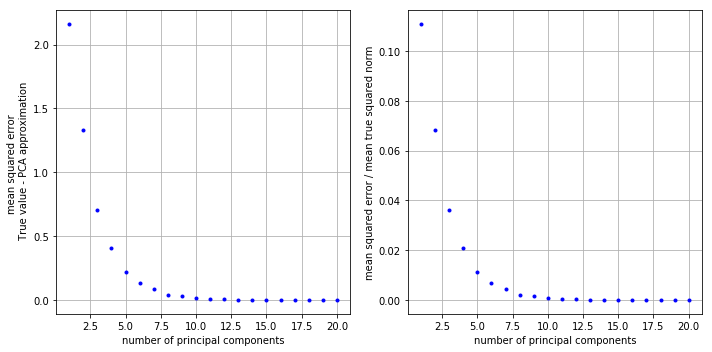

In [176]:
# compute residual error as we increase the number of principal components
mse_array = []
for pca_count in range(1,X.shape[0]+1):
  mse_array.append(mean_squared_error(X,eigenvectors_l[:,0:pca_count]))

fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,5))
axis1.plot(range(1,X.shape[0]+1),mse_array,'.b')
axis1.set_xlabel('number of principal components')
axis1.set_ylabel('mean squared error \n True value - PCA approximation')
axis1.grid()

axis2.plot(range(1,X.shape[0]+1),mse_array/(np.linalg.norm(X)**2/(X.shape[1])),'.b')
axis2.set_xlabel('number of principal components')
axis2.set_ylabel('mean squared error / mean true squared norm')
axis2.grid()
plt.tight_layout()

## Exercise
* How does PCA perform when the data is not normalized?